<a href="https://colab.research.google.com/github/Taneyquezada/Estadistica/blob/main/ei_u3_004_22150442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte (a) Selección y Visualización de la Serie de Tiempo
Seleccionar una marca y obtener los datos:

Utiliza una fuente confiable como Yahoo Finance o una API (por ejemplo, Alpha Vantage) para obtener los precios de cierre diarios de una acción específica durante el último año.
Graficar la serie de tiempo:

Una vez que tengas los datos, utiliza matplotlib en Python para graficar la serie de tiempo de precios de cierre.
Etiqueta los ejes adecuadamente: el eje x debe decir "Fecha" y el eje y debe decir "Precio de cierre". Incluye una leyenda con el nombre de la marca si es necesario.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='PG',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,PG_Open,PG_High,PG_Low,PG_Close,PG_Adj Close,PG_Volume
Date,,,,,,
2024-01-02,146.360001,149.410004,146.309998,148.740005,143.353867,7238400
2024-01-03,148.339996,149.199997,147.179993,147.839996,142.486435,7697500
2024-01-04,148.050003,149.270004,147.770004,148.649994,143.267090,7067400
2024-01-05,148.720001,148.869995,146.550003,147.419998,142.081650,5294200
2024-01-08,147.910004,148.919998,147.649994,148.690002,143.305649,8255300
...,...,...,...,...,...,...
2025-03-25,165.300003,165.369995,162.199997,162.850006,161.841202,8366700
2025-03-26,163.350006,166.820007,162.990005,166.580002,165.548080,7756000
2025-03-27,167.869995,169.029999,166.619995,168.710007,167.664902,6211700


# Importar dataframe si YF da error

In [13]:
pip install alpha_vantage

In [14]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

my_key = '4OFA8WAFK4CCMTQM'

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AMZN
ticker = 'PG'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,PG_Open,PG_High,PG_Low,PG_Close,PG_Volume
date,,,,,
2025-04-01,170.5700,171.0500,169.0600,170.56,7021507.0
2025-03-31,168.1015,171.1400,168.1015,170.42,11520451.0
2025-03-28,169.3800,169.7100,167.6200,168.03,5479306.0
2025-03-27,167.8700,169.0300,166.6200,168.71,6211735.0
2025-03-26,163.3500,166.8200,162.9900,166.58,7757259.0
...,...,...,...,...,...
2024-01-08,147.9100,148.9200,147.6500,148.69,8255307.0
2024-01-05,148.7200,148.8700,146.5500,147.42,5227247.0
2024-01-04,148.0500,149.2669,147.7700,148.65,7067618.0


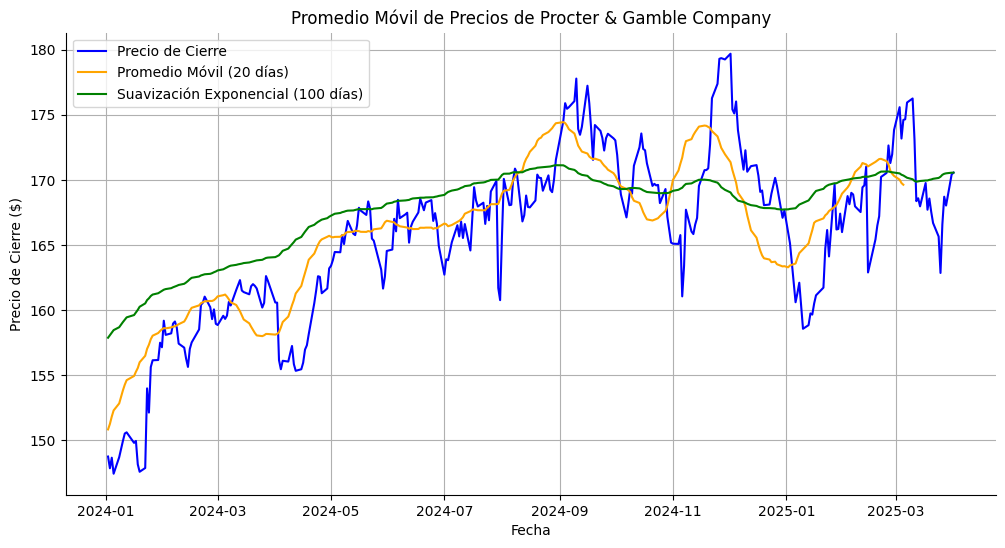

In [15]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['PG_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['PG_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['PG_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Procter & Gamble Company')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#Parte (b) Prueba de Estacionariedad
Prueba de raíz unitaria (ADF o KPSS):

Usa una prueba de Dickey-Fuller aumentada (ADF) o KPSS para evaluar la estacionariedad de la serie.
La prueba ADF tiene como hipótesis nula que la serie no es estacionaria (tiene raíz unitaria).
La prueba KPSS tiene como hipótesis nula que la serie es estacionaria.

In [16]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['PG_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -1.6591453106172922
p-value: 0.45227534861492374
La tendencia no es estacionaria (aceptamos la hipótesis nula).


#Parte (c) Regresión Polinomial y Estacionariedad de los Residuales
1- Regresión Polinomial:

Realiza una regresión polinomial de diferentes grados (por ejemplo, grados 1 a 3) para encontrar el grado mínimo necesario que haga estacionarios los residuales.
Utiliza numpy o scikit-learn para ajustar la regresión polinomial.

2- Graficar los Residuales:

Grafica los residuales para observar si hay algún patrón de estacionalidad visible.
Un patrón de estacionalidad podría aparecer como ciclos recurrentes o patrones repetitivos.

3- Prueba de Estacionariedad en los Residuales:

Realiza una prueba de Dickey-Fuller (ADF) en los residuales para verificar si son estacionarios.
Un resultado estacionario en los residuales sugiere que el modelo polinomial ha capturado adecuadamente la tendencia de la serie.

4- Inferir la Estacionalidad y Aplicar una Prueba de Hipótesis:

Si los residuales presentan un patrón cíclico o repetitivo en el gráfico, es posible que tengan estacionalidad.
Usa el gráfico ACF para confirmar la presencia de estacionalidad. Picos en la ACF en intervalos regulares pueden indicar estacionalidad.

. En Python, un análisis indirecto puede hacerse con seasonal_decompose.


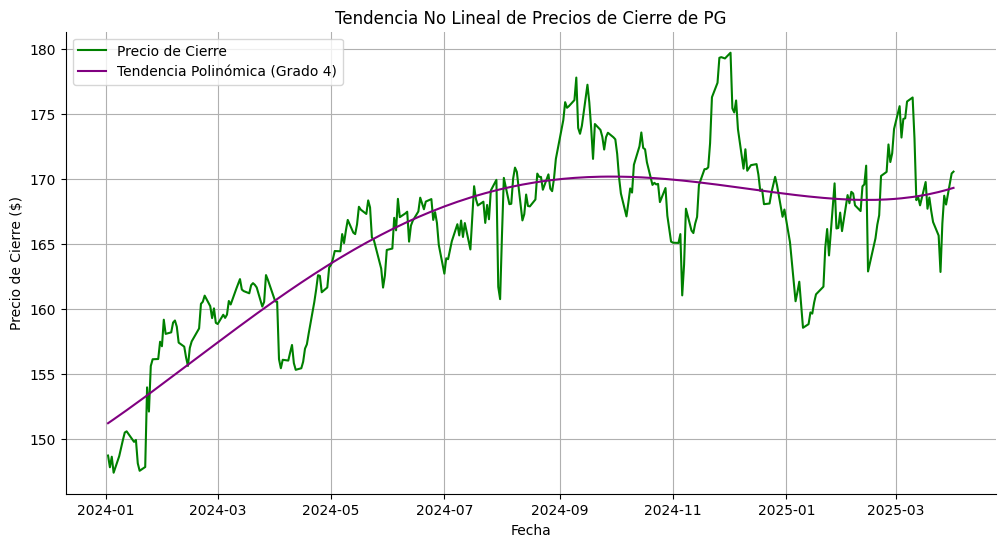

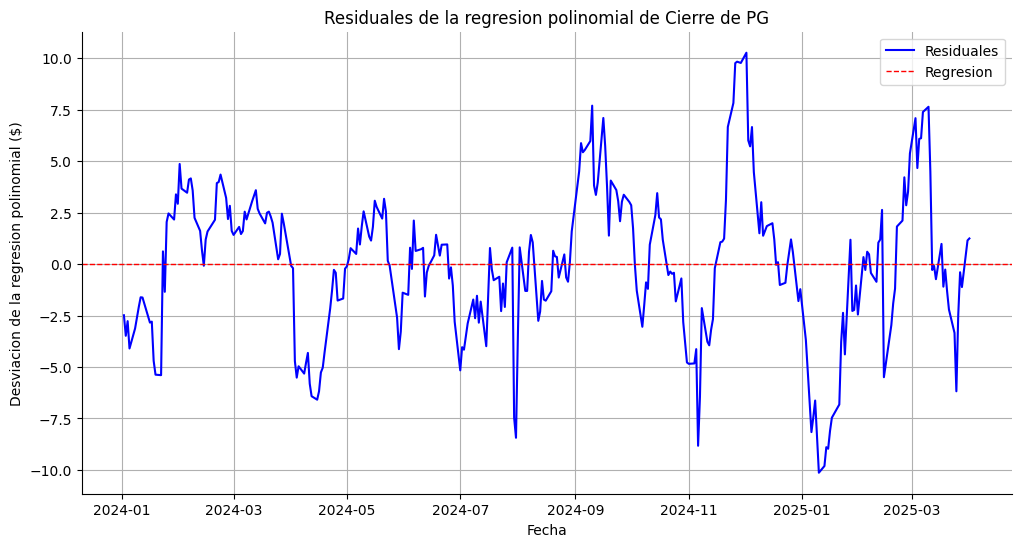

In [17]:
#1- Regresión polinomial

from numpy.polynomial.polynomial import Polynomial

df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['PG_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de PG') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




#2- Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de PG')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Estadístico ADF: -4.303508977698647
p-value: 0.00043803801631566884
La tendencia es estacionaria (rechazamos la hipótesis nula) y el modelo
polinomial ha capturado adecuadamente la tendencia de la serie.

 Grado 1


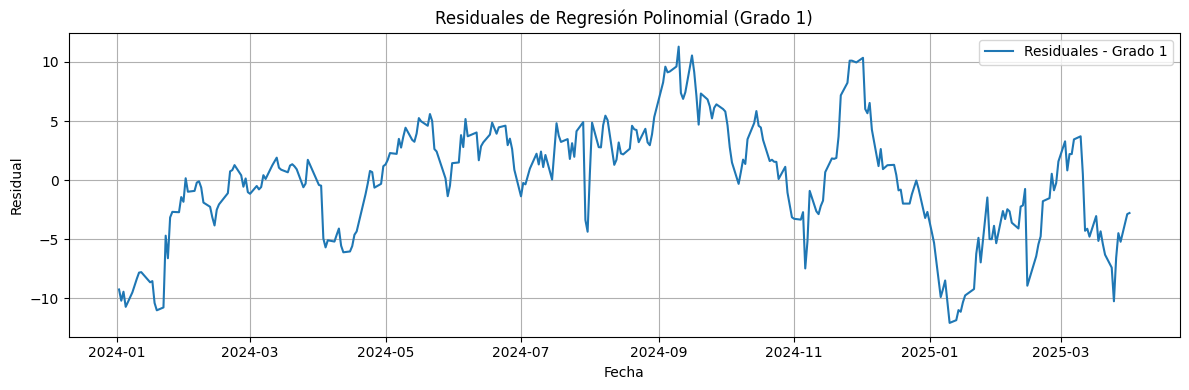

Estadístico ADF: -2.9302
Valor-p: 0.0419
¿Rechazamos H0 (NO estacionario)? Sí
Gráfico ACF para los residuales del modelo grado 1


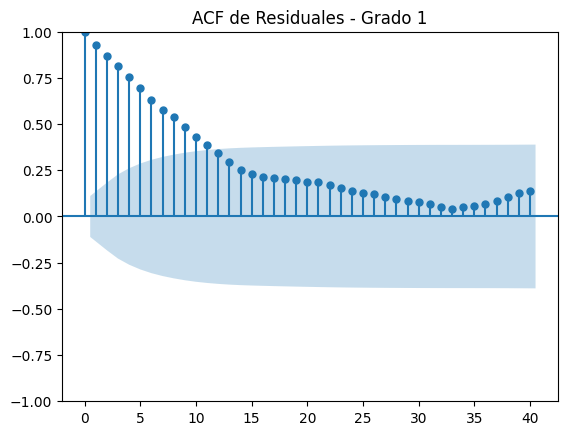


 Grado 2


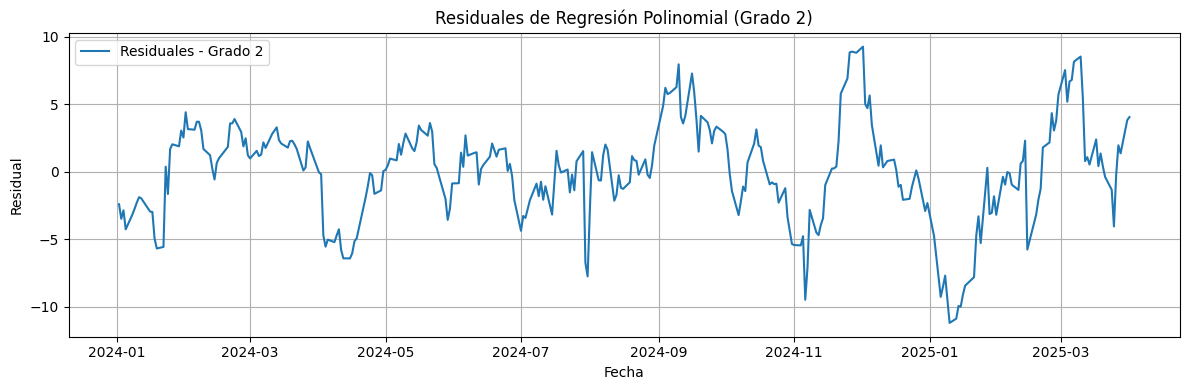

Estadístico ADF: -4.2881
Valor-p: 0.0005
¿Rechazamos H0 (NO estacionario)? Sí
Gráfico ACF para los residuales del modelo grado 2


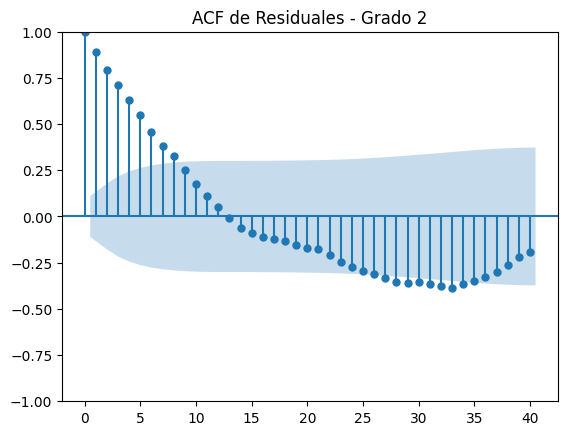


 Grado 3


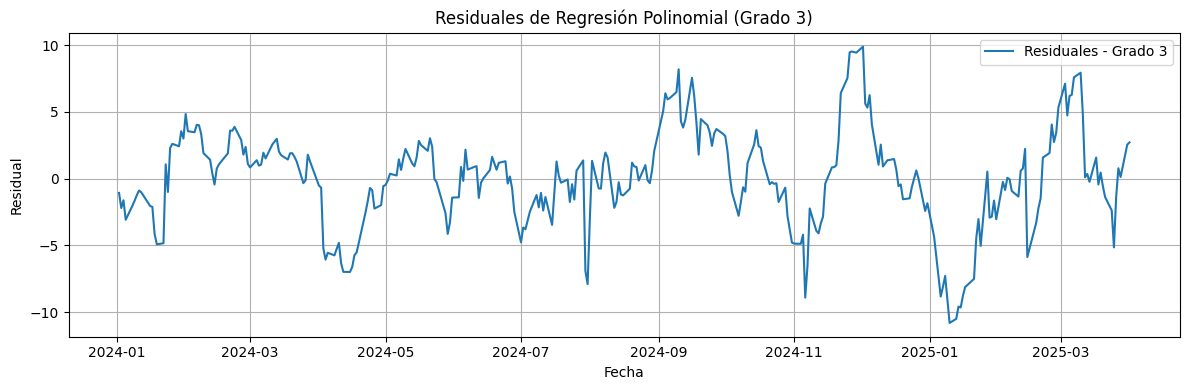

Estadístico ADF: -4.3087
Valor-p: 0.0004
¿Rechazamos H0 (NO estacionario)? Sí
Gráfico ACF para los residuales del modelo grado 3


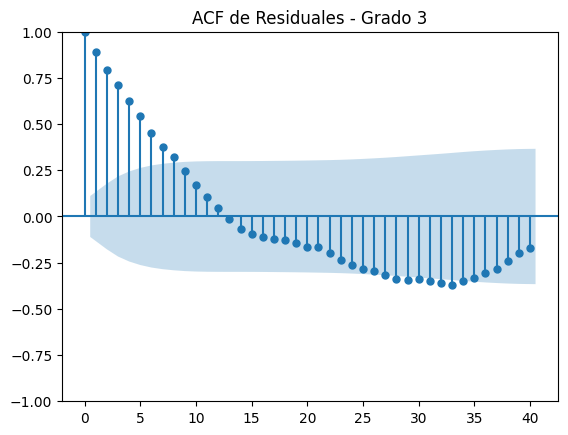

In [19]:
#3- Prueba de estacionariedad en los residuales
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF

print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula) y el modelo\npolinomial ha capturado adecuadamente la tendencia de la serie.")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Tomamos los datos de cierre y lo convertimos en numpy
y = df['PG_Close'].values
X = np.arange(len(y)).reshape(-1, 1)  # Variable de tiempo

# Probar grados polinomiales del 1 al 3
for grado in range(1, 4):
    print(f'\n Grado {grado}')

    # Transformación polinomial
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    # Ajustar regresión lineal sobre X transformado
    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # Predicción y cálculo de residuales
    y_pred = modelo.predict(X_poly)
    residuales = y - y_pred

    # Graficar residuales
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, residuales, label=f'Residuales - Grado {grado}')
    plt.title(f'Residuales de Regresión Polinomial (Grado {grado})')
    plt.xlabel('Fecha')
    plt.ylabel('Residual')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Prueba ADF sobre los residuales
    adf_test = adfuller(residuales)
    print(f'Estadístico ADF: {adf_test[0]:.4f}')
    print(f'Valor-p: {adf_test[1]:.4f}')
    print(f'¿Rechazamos H0 (NO estacionario)?', 'Sí' if adf_test[1] < 0.05 else 'No')

    # Gráfico ACF de los residuales
    print(f'Gráfico ACF para los residuales del modelo grado {grado}')
    plot_acf(residuales, lags=40)
    plt.title(f'ACF de Residuales - Grado {grado}')
    plt.show()

#Conclusión
Rechazamos la hipótesis nula de no estacionariedad (con un 95% de confianza), por lo tanto, los residuales son estacionarios.

Sin embargo, el valor del ADF es cercano al umbral, lo cual indica que la estacionariedad no es completamente fuerte.

La gráfica muestra residuales más aleatoriamente distribuidos, sin una tendencia visual clara o patrones persistentes.

Esto indica que el modelo de grado 2 ajusta mejor los datos y elimina más eficientemente la tendencia.

El modelo polinomial de grado 2 es más adecuado para la serie temporal analizada.

Ha capturado mejor la tendencia de la serie, produciendo residuales más estacionarios y menos autocorrelacionados.

El modelo de grado 1, aunque logró cierta estacionariedad en los residuales, presenta evidencia de autocorrelación que podría afectar la validez de inferencias posteriores.
